In [1]:
from photonflux.circuit import PhotonicCircuit
from photonflux.component_models import models_dict
import numpy as np
import networkx as nx
import gdsfactory as gf
import matplotlib.pyplot as plt

2023-02-13 16:34:40.526 | INFO     | gdsfactory.config:<module>:51 - Load '/opt/anaconda3/lib/python3.8/site-packages/gdsfactory' 6.37.3
2023-02-13 16:34:40.552 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /opt/anaconda3/lib/python3.8/site-packages/gdsfactory/generic_tech/klayout/tech/layers.lyp.


In [2]:
c = gf.Component()
ring_ref = c << gf.components.ring_single_pn()
c.add_ports(ring_ref.ports)
ring_netlist_for_test = c.get_netlist()

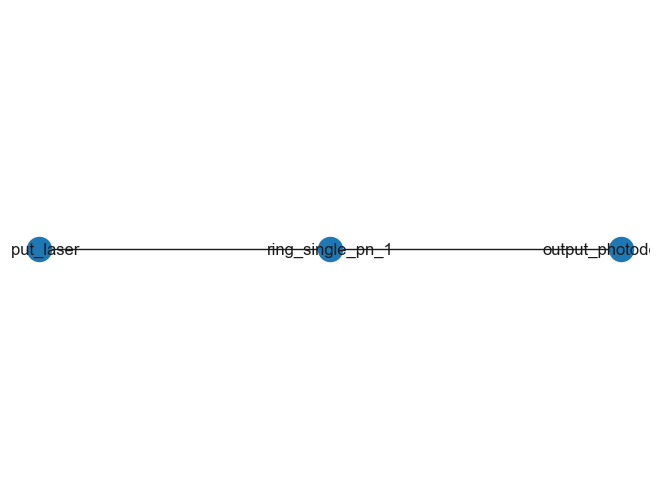

In [3]:
ring_circuit = PhotonicCircuit(ring_netlist_for_test, models_dict)

input_port = ring_circuit.ports[0]
output_port = ring_circuit.ports[1]

ring_circuit.add_laser_port(input_port, ring_circuit.positions)
ring_circuit.add_photodetector_port(output_port, ring_circuit.positions)

pos = {k: (v["x"], v["y"]) for k, v in ring_circuit.positions.items()}

nx.draw(
    ring_circuit.graph,
    with_labels=True,
    font_weight=8,
    pos=pos,
)

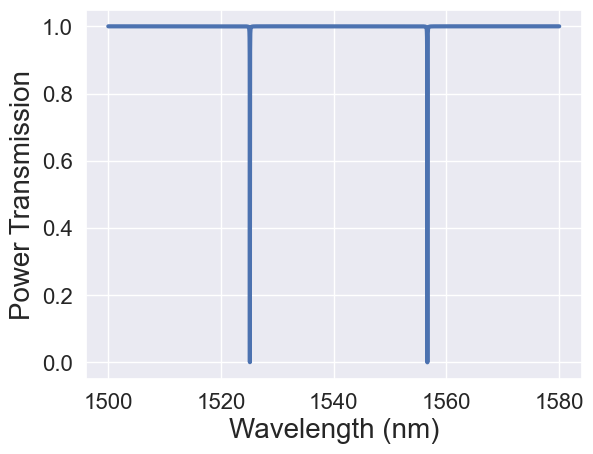

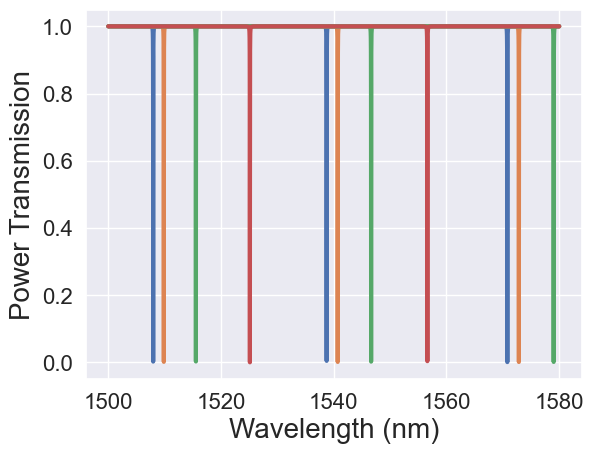

In [7]:
# Wavelength sweep
wavelength_sweep = np.linspace(1.50e-6,1.58e-6,num=100000)
storage = []
for wl in wavelength_sweep:
    ring_circuit.update_wavelength(wl)
    ring_circuit.update_all_edges()
    detector_value = ring_circuit.readout_from_photodetectors()
    storage.append(detector_value[0])

ring_circuit.update_wavelength(1.55e-6)

plt.figure()
plt.plot(wavelength_sweep*1e9,storage)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Transmission")
plt.show()

ring_ref = ring_circuit.return_components_callback(["ring_single_pn_1"])[0]

wavelength_sweep = np.linspace(1.50e-6,1.58e-6,num=50000)
storage_V0 = []
storage_V05 = []
storage_V1 = []
storage_V15 = []
for wl in wavelength_sweep:
    ring_circuit.update_wavelength(wl)
    ring_ref.update_voltage(0)
    ring_circuit.update_all_edges()
    detector_value = ring_circuit.readout_from_photodetectors()
    storage_V0.append(detector_value[0])

    ring_ref.update_voltage(0.5)
    ring_circuit.update_all_edges()
    detector_value = ring_circuit.readout_from_photodetectors()
    storage_V05.append(detector_value[0])

    ring_ref.update_voltage(1.0)
    ring_circuit.update_all_edges()
    detector_value = ring_circuit.readout_from_photodetectors()
    storage_V1.append(detector_value[0])

    ring_ref.update_voltage(1.5)
    ring_circuit.update_all_edges()
    detector_value = ring_circuit.readout_from_photodetectors()
    storage_V15.append(detector_value[0])

ring_circuit.update_wavelength(1.55e-6)

plt.figure()
plt.plot(wavelength_sweep*1e9,storage_V0)
plt.plot(wavelength_sweep*1e9,storage_V05)
plt.plot(wavelength_sweep*1e9,storage_V1)
plt.plot(wavelength_sweep*1e9,storage_V15)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Transmission")
plt.show()